In [ ]:
import typing
import urllib.request

import IPython.display
from PIL import Image as PIL_Image
from PIL import ImageOps as PIL_ImageOps
from google import genai
from google.genai.types import (
    Image,
    ProductImage,
    RecontextImageConfig,
    RecontextImageSource,
)
import matplotlib.image as img
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def display_image(
    image,
    max_width: int = 700,
    max_height: int = 400,
) -> None:
    pil_image = typing.cast(PIL_Image.Image, image._pil_image)
    if pil_image.mode != "RGB":
        # RGB is supported by all Jupyter environments (e.g. RGBA is not yet)
        pil_image = pil_image.convert("RGB")
    image_width, image_height = pil_image.size
    if max_width < image_width or max_height < image_height:
        # Resize to display a smaller notebook image
        pil_image = PIL_ImageOps.contain(pil_image, (max_width, max_height))
    IPython.display.display(pil_image)


def display_local_image(
    images: list[str],
) -> None:
    fig, axes = plt.subplots(1, len(images), figsize=(12, 6))
    if len(images) == 1:
        axes = np.array([axes])
    for i, ax in enumerate(axes):
        image = img.imread(images[i])
        ax.imshow(image)
        ax.axis("off")
    plt.show()

In [6]:
PROJECT_ID = "virtual-try-on-486604"
LOCATION = "us-central1"
VIRTUAL_TRY_ON_MODEL = "virtual-try-on-001"

client = genai.Client(vertexai=True, project=PROJECT_ID, location=LOCATION)

In [6]:
# Test the connection by listing available models
try:
    models = client.models.list()
    print("Connection successful! Available models:")
    for model in models:
        print(f"  - {model.name}")
except Exception as e:
    print(f"Connection failed: {e}")

Connection successful! Available models:
  - publishers/google/models/imageclassification-efficientnet
  - publishers/google/models/occupancy-analytics
  - publishers/google/models/multimodalembedding
  - publishers/google/models/pt-test
  - publishers/google/models/imageclassification-vit
  - publishers/google/models/bert-base
  - publishers/google/models/vehicle-detector
  - publishers/google/models/language-v1-classify-text-v1
  - publishers/google/models/language-v1-analyze-sentiment
  - publishers/google/models/language-v1-analyze-entity-sentiment
  - publishers/google/models/language-v1-analyze-syntax
  - publishers/google/models/resnet50
  - publishers/google/models/imagesegmentation-deeplabv3
  - publishers/google/models/imageobjectdetection-yolo
  - publishers/google/models/owlvit-base-patch32
  - publishers/google/models/object-detector
  - publishers/google/models/ppe-detector
  - publishers/google/models/people-blur
  - publishers/google/models/product-recognizer
  - publis

In [1]:
HUMAN_IMAGE_URL = "D:/CADT/Year_3-Term_2/Capstone/OOTDiffusion/photo_2026-01-27_17-53-30.jpg"
GARMENT_IMAGE_URL = "D:/CADT/Year_3-Term_2/Capstone/OOTDiffusion/run/examples/garment/00055_00.jpg"

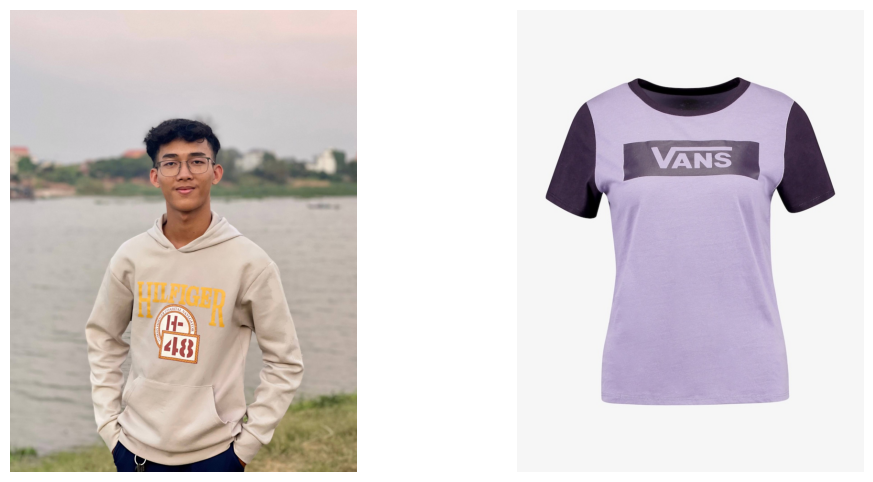

In [5]:
display_local_image([HUMAN_IMAGE_URL, GARMENT_IMAGE_URL])

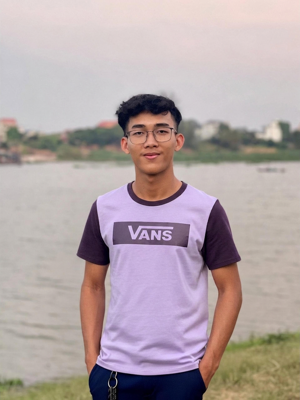

In [7]:
response = client.models.recontext_image(
    model=VIRTUAL_TRY_ON_MODEL,
    source=RecontextImageSource(
        person_image=Image.from_file(location=HUMAN_IMAGE_URL),
        product_images=[
            ProductImage(product_image=Image.from_file(location=GARMENT_IMAGE_URL))
        ],
    ),
    config=RecontextImageConfig(
        output_mime_type="image/jpeg",
        number_of_images=1,
        safety_filter_level="BLOCK_LOW_AND_ABOVE",
    ),
)

response.generated_images[0].image.save("try-on.jpeg")
display_image(response.generated_images[0].image)